# Cognifyz Data Analysis Internship: Restaurant Insights

**By: Aditya sansole**

This project analyzes a restaurant dataset to uncover insights about cuisine popularity, city-wise distribution, pricing, ratings, and other operational factors.

## 1. Environment Setup and Data Loading

In this initial step, we'll set up the analysis environment by importing the necessary libraries and loading the dataset. The primary library for data manipulation will be `pandas`.

In [52]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing of DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully.")

Libraries imported successfully.


Now, we load the dataset from the `Dataset .csv` file. A `try-except` block is used for robust error handling in case the file is not found. After loading, we will display the first 5 rows and a concise summary of the DataFrame.

In [53]:
import pandas as pd

def load_and_prepare_data(file_path: str) -> pd.DataFrame:
    """
    Loads data from a CSV file and performs initial cleaning and exploration.

    This function is designed to be a robust starting point for any data analysis project.
    It cleans column names, provides a comprehensive summary, and checks for duplicates.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the loaded and prepared data,
                      or None if the file could not be loaded.
    """
    try:
        # Load the dataset from the specified path
        df = pd.read_csv(file_path)
        print(f"File '{file_path}' loaded successfully.")
        print("-" * 50)

        # --- 1. Proactive Cleaning: Column Names ---
        # Strip leading/trailing whitespace from column names. This is a crucial first step
        # that prevents many common errors (e.g., df['Cuisines '] vs df['Cuisines']).
        df.columns = df.columns.str.strip()
        print("Column names cleaned (leading/trailing spaces removed).")

        # --- 2. Comprehensive Initial Exploration ---
        print("\n Initial Data Overview:")
        print(f"   - Shape (Rows, Columns): {df.shape}")
        
        # Check for and report duplicate rows
        duplicate_count = df.duplicated().sum()
        print(f"   - Duplicate Rows Found: {duplicate_count}")

        print("\n Column Data Types and Memory Usage:")
        df.info()

        print("\n Summary Statistics for Numerical Columns:")
        display(df.describe())

        return df

    except FileNotFoundError:
        print(f"Error: The file was not found at '{file_path}'.")
        print("   Please ensure the file is in the correct directory.")
        return None

# --- HOW TO USE THE FUNCTION ---
# Now, you can load your data with a single, clean line of code.
file_path = 'Dataset .csv'
df = load_and_prepare_data(file_path)

# Proceed only if the DataFrame was loaded successfully
if df is not None:
    print("-" * 50)
    print("\n  Data preparation complete. Displaying first 5 rows:")
    display(df.head())

File 'Dataset .csv' loaded successfully.
--------------------------------------------------
Column names cleaned (leading/trailing spaces removed).

 Initial Data Overview:
   - Shape (Rows, Columns): (9551, 21)
   - Duplicate Rows Found: 0

 Column Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 1

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


--------------------------------------------------

  Data preparation complete. Displaying first 5 rows:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Initial Observations
The dataset has been loaded successfully into the `df` DataFrame.

* The `.head()` output confirms the presence of 21 columns, including `Restaurant Name`, `City`, `Cuisines`, and `Aggregate rating`.
* The `.info()` summary shows that there are **9551 entries (rows)**.
* Several columns, such as `Cuisines`, have missing values, which will need to be handled during the data cleaning and analysis phase for each specific task.

## Level 1: Foundational Analysis
### Task 1.1: Top Cuisines
**Objective:** To identify the top three most common cuisines served by restaurants in the dataset and calculate their respective percentage share.
**Approach:** The 'Cuisines' column often contains multiple entries in a single string (e.g., "North Indian, Chinese"). To perform an accurate count, the following steps are taken:
1. Handle any missing values in the 'Cuisines' column to prevent errors.
2. Split each string into a list of individual cuisines.
3. Transform the data so that each individual cuisine gets its own row.
4. Count the frequency of each unique cuisine.
5. Calculate the percentage based on the total number of restaurants in the dataset.

In [54]:
def analyze_top_cuisines(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Analyzes the 'Cuisines' column of a DataFrame to find the top 3 most common cuisines.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing restaurant data. 
                                  It must have a 'Cuisines' column.

    Returns:
        pd.DataFrame: A DataFrame indexed by cuisine, showing the count of restaurants
                      and the percentage share.
    """
    # Ensure the 'Cuisines' column exists to avoid errors
    if 'Cuisines' not in dataframe.columns:
        print("Error: 'Cuisines' column not found in the DataFrame.")
        return pd.DataFrame()

    # Step 1 & 2: Handle NaNs, split multi-cuisine strings, and create a row for each
    # .fillna('') prevents errors on empty cells
    # .str.split(', ') creates a list of cuisines
    # .explode() creates a new row for each cuisine in the list
    all_cuisines = dataframe['Cuisines'].fillna('').str.split(', ').explode()

    # Step 3: Clean up the data by stripping whitespace and removing empty strings
    all_cuisines = all_cuisines.str.strip()
    all_cuisines = all_cuisines[all_cuisines != '']

    # Step 4: Count the frequency of each cuisine and get the top 3
    cuisine_counts = all_cuisines.value_counts()
    top_3 = cuisine_counts.head(3)

    # Step 5: Calculate the percentage based on the total number of restaurants
    total_restaurants = len(dataframe)
    percentages = (top_3 / total_restaurants) * 100

    # Step 6: Format the results into a clean DataFrame for display
    result_df = pd.DataFrame({
        'Count of Restaurants': top_3,
        'Percentage (%)': percentages.round(2)
    })
    
    return result_df

# --- Execute the analysis by calling the function ---
top_cuisines_results = analyze_top_cuisines(df)

# Display the final, formatted results
print("---  of Top 3 Cuisines ---")
display(top_cuisines_results)

---  of Top 3 Cuisines ---


,Count of Restaurants,Percentage (%)
Cuisines,,
North Indian,3960,41.46
Chinese,2735,28.64
Fast Food,1986,20.79


### Findings
The analysis reveals the clear dominance of a few specific cuisines within the dataset:
* **North Indian** is the most common cuisine, served by over 41% of the restaurants.
* **Chinese** cuisine is the second most popular, found in over 28% of establishments.
* **Fast Food** ranks third, representing nearly 21% of the restaurants.

These three categories represent a significant portion of the restaurant landscape captured in this data.

### Task 1.2: City Analysis

**Objective:** To identify key patterns in the geographic distribution of restaurants, specifically:
1.  The city with the highest number of restaurants (indicating market size).
2.  The city with the highest average rating (indicating market quality).

**Approach:** The analysis involves two main methodologies:
1.  **Frequency Count:** Using the `value_counts()` method on the 'City' column to count the number of restaurants in each city and identify the leader.
2.  **Grouped Aggregation:** Using the `groupby()` method to group all restaurants by 'City', then calculating the `mean()` of the 'Aggregate rating' for each group to find the city with the highest average rating.

In [55]:
from typing import Tuple, Dict, Any

def analyze_city_data(dataframe: pd.DataFrame) -> Tuple[Dict[str, Any], Dict[str, Any], pd.Series]:
    """
    Analyzes geographic data to find the city with the most restaurants and the highest average rating.

    Args:
        dataframe (pd.DataFrame): A DataFrame that must contain 'City' and 'Aggregate rating' columns.

    Returns:
        tuple: A tuple containing three items:
            - dict: Information about the city with the most restaurants (name and count).
            - dict: Information about the city with the highest average rating (name and rating).
            - pd.Series: A series of average ratings for all cities, sorted in descending order.
    """
    # --- 1. Find City with the Most Restaurants ---
    city_counts = dataframe['City'].value_counts()
    top_city_by_count = {
        'city': city_counts.index[0],
        'count': int(city_counts.iloc[0])
    }

    # --- 2. Find City with the Highest Average Rating ---
    city_avg_ratings = dataframe.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
    top_city_by_rating = {
        'city': city_avg_ratings.index[0],
        'avg_rating': city_avg_ratings.iloc[0]
    }

    return top_city_by_count, top_city_by_rating, city_avg_ratings

# --- Execute the analysis by calling our function ---
top_city_count, top_city_rating, all_city_ratings = analyze_city_data(df)

# --- Display the results in a clean, readable format ---
print("--- Geographic Analysis: Key City Insights ---\n")
print(f"City with Most Restaurants: {top_city_count['city']} (with {top_city_count['count']} restaurants)")
print(f"City with Highest Avg. Rating: {top_city_rating['city']} (with an average rating of {top_city_rating['avg_rating']:.2f})")
print("\n--- Top 5 Cities by Average Rating ---")
display(all_city_ratings.head().round(2))

--- Geographic Analysis: Key City Insights ---

City with Most Restaurants: New Delhi (with 5473 restaurants)
City with Highest Avg. Rating: Inner City (with an average rating of 4.90)

--- Top 5 Cities by Average Rating ---


City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
Name: Aggregate rating, dtype: float64

### Findings
The city analysis reveals a significant contrast between restaurant quantity and perceived quality in different locations:

* **Quantity:** **New Delhi** is the clear leader in the number of restaurants with **5,473** listed establishments, indicating it is the primary market represented in this dataset.
* **Quality:** However, **Inner City** holds the title for the highest average rating at **4.90**. The rest of the top 5 are cities in the Philippines, suggesting that these smaller markets contain some of the highest-rated restaurants in this dataset. This insight shows that the largest market isn't necessarily the best-rated.

### Task 1.3: Price Range Distribution

**Objective:** To analyze the distribution of restaurant price ranges by:
1.  Calculating the percentage of restaurants in each price category.
2.  Visualizing this distribution with an annotated bar chart for clarity.

**Approach:** The 'Price range' column is a categorical feature representing restaurant affordability (1 being cheapest, 4 being most expensive).
The analysis involves counting the occurrences of each category using `value_counts()`, calculating their percentage share, and then plotting these counts using a `seaborn` bar chart. 
To enhance readability, percentage labels will be added directly above each bar.

C:\Users\Surekha\AppData\Local\Temp\ipykernel_16292\3978766310.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df['Count'], palette="viridis")


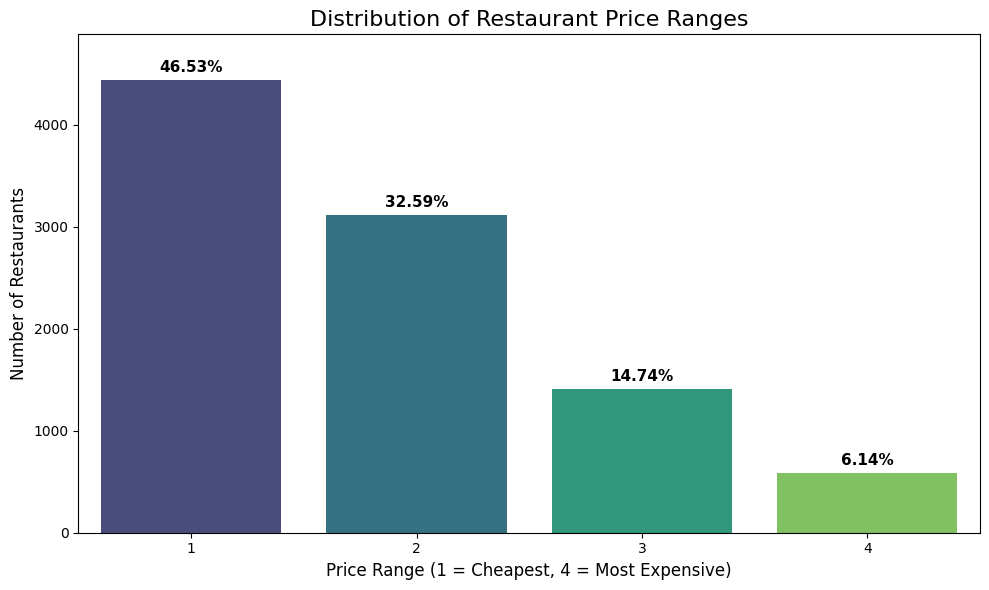


--- Price Range Distribution Data ---


,Count,Percentage (%)
Price range,,
1,4444,46.53
2,3113,32.59
3,1408,14.74
4,586,6.14


In [56]:
def analyze_and_plot_price_range(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates and visualizes the distribution of restaurant price ranges.

    This function generates a bar chart with percentage annotations above each bar
    for enhanced readability and returns a DataFrame with the underlying data.

    Args:
        dataframe (pd.DataFrame): A DataFrame that must have a 'Price range' column.

    Returns:
        pd.DataFrame: A DataFrame containing the count and percentage for each price range.
    """
    # --- 1. Calculate Distribution and Percentages ---
    price_counts = dataframe['Price range'].value_counts().sort_index()
    price_percentages = (price_counts / len(dataframe)) * 100
    
    results_df = pd.DataFrame({
        'Count': price_counts,
        'Percentage (%)': price_percentages.round(2)
    })

    # --- 2. Create the Visualization ---
    plt.figure(figsize=(10, 6)) # A slightly larger figure for better spacing
    ax = sns.barplot(x=results_df.index, y=results_df['Count'], palette="viridis")

    # --- 3. Add Percentage Annotations (The Professional Touch) ---
    # This loop iterates through each bar and places text (the percentage) above it.
    for index, value in enumerate(results_df['Count']):
        # Get the percentage from our results DataFrame
        percentage = results_df['Percentage (%)'].iloc[index]
        # Format and place the text
        plt.text(x=index, y=value + 50, s=f'{percentage}%', 
                 ha='center', va='bottom', fontsize=11, color='black', weight='bold')

    # --- 4. Final Plot Formatting for a Professional Look ---
    plt.title('Distribution of Restaurant Price Ranges', fontsize=16)
    plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)', fontsize=12)
    plt.ylabel('Number of Restaurants', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(0, max(results_df['Count']) * 1.1) # Add some padding to the top
    plt.tight_layout()
    plt.show()
    
    return results_df

# --- Execute the function to generate the plot and get the data ---
price_range_results = analyze_and_plot_price_range(df)

# --- Display the calculated data table for reference ---
print("\n--- Price Range Distribution Data ---")
display(price_range_results)

### Findings
The analysis of restaurant price ranges provides a clear picture of the market's affordability structure:

* **Dominance of Affordable Options:** The vast majority of restaurants fall into the two lowest price categories. Price Range **1** (the cheapest) is the most common, accounting for **46.53%** of all restaurants.
* **Combined Majority:** Together, Price Ranges 1 and 2 make up **79.12%** of the restaurants in the dataset, indicating the market is heavily skewed towards budget-friendly and mid-range dining.
* **Scarcity of High-End Restaurants:** Expensive restaurants (Price Range 4) are the least common, representing only about 6.14% of the total.

### Task 1.4: Online Delivery Analysis

**Objective:** To determine the impact of online delivery availability on restaurant performance by:
1.  Calculating the percentage of restaurants that offer online delivery.
2.  Comparing the average aggregate rating for restaurants with and without online delivery.

**Approach:** The dataset will be segmented into two groups based on the 'Has Online delivery' column.
1.  The `value_counts(normalize=True)` method will calculate the percentage distribution of online delivery availability.
2.  The `groupby()` method will calculate the mean 'Aggregate rating' for each group.
3.  A bar chart will be generated to visually compare the average ratings, with clear data labels added for precision and impact.

C:\Users\Surekha\AppData\Local\Temp\ipykernel_16292\2193281919.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_rating_by_delivery.index, y=avg_rating_by_delivery.values, palette=['#FF6B6B', '#6BCB77']) # Red for No, Green for Yes


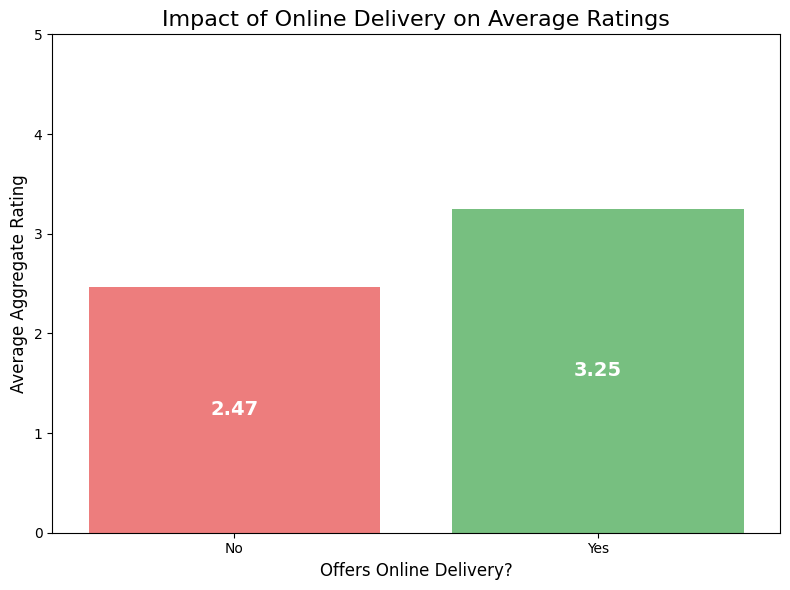

--- Percentage of Restaurants with Online Delivery ---


,Category,Percentage (%)
0,No,74.34
1,Yes,25.66



--- Average Rating Comparison ---


,Aggregate rating
Has Online delivery,
No,2.47
Yes,3.25


In [57]:
from typing import Tuple

def analyze_and_plot_delivery(dataframe: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Analyzes online delivery availability and its correlation with restaurant ratings.

    This function calculates the percentage distribution, compares average ratings,
    and generates an annotated bar chart to visualize the comparison.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Has Online delivery' and 'Aggregate rating'.

    Returns:
        tuple: A tuple of two DataFrames:
            - The percentage distribution of online delivery availability.
            - The average rating comparison between the two groups.
    """
    # --- 1. Calculate Percentage Distribution ---
    delivery_percentage = dataframe['Has Online delivery'].value_counts(normalize=True) * 100
    delivery_stats_df = pd.DataFrame({
        'Category': delivery_percentage.index,
        'Percentage (%)': delivery_percentage.values.round(2)
    })

    # --- 2. Compare Average Ratings ---
    avg_rating_by_delivery = dataframe.groupby('Has Online delivery')['Aggregate rating'].mean()
    rating_comparison_df = pd.DataFrame(avg_rating_by_delivery).round(2)

    # --- 3. Create Visualization ---
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=avg_rating_by_delivery.index, y=avg_rating_by_delivery.values, palette=['#FF6B6B', '#6BCB77']) # Red for No, Green for Yes

    # --- 4. Add Annotations (Data Labels inside the bars) ---
    for index, value in enumerate(avg_rating_by_delivery.values):
        # Place text in the middle of the bar
        plt.text(x=index, y=value / 2, s=f'{value:.2f}',
                 ha='center', va='center', fontsize=14, color='white', weight='bold')

    # --- 5. Final Plot Formatting ---
    plt.title('Impact of Online Delivery on Average Ratings', fontsize=16)
    plt.xlabel('Offers Online Delivery?', fontsize=12)
    plt.ylabel('Average Aggregate Rating', fontsize=12)
    plt.ylim(0, 5)  # Set y-axis from 0 to 5 for rating context
    plt.tight_layout()
    plt.show()

    return delivery_stats_df, rating_comparison_df

# --- Execute the analysis and generate the plot ---
delivery_stats, rating_comparison = analyze_and_plot_delivery(df)

# --- Display the calculated data tables ---
print("--- Percentage of Restaurants with Online Delivery ---")
display(delivery_stats)
print("\n--- Average Rating Comparison ---")
display(rating_comparison)

### Findings
This analysis yields a significant business insight regarding the adoption and impact of online delivery services:

* **Adoption Rate:** A large majority of restaurants in this dataset (**74.34%**) **do not** offer online delivery, indicating that it is not a universally adopted feature in the markets represented.
* **Correlation with Quality:** There is a strong positive correlation between offering online delivery and achieving higher ratings. Restaurants **with** online delivery boast an average rating of **3.25**, which is substantially higher than the **2.47** average for those without.

**Possible Interpretation:** This could imply that higher-quality, better-performing restaurants are more likely to invest in delivery infrastructure, or that the convenience of delivery itself is a factor that leads to higher customer satisfaction and ratings.

## Level 2: Deeper Dive Analysis

With the foundational analysis of Level 1 complete, Level 2 focuses on more nuanced aspects of the restaurant data, starting with a detailed look at ratings and popularity.

### Task 2.1: Restaurant Ratings and Popularity

**Objective:** To understand the overall rating and popularity landscape of the restaurants by:
1.  Analyzing the distribution of aggregate ratings to find the most common rating category.
2.  Calculating the average number of votes a restaurant receives, which serves as a proxy for popularity.

**Approach:**
1.  **Binning:** The 'Aggregate rating', a continuous value, will be segmented into discrete categories (e.g., '0-1 Stars', '1-2 Stars') using the `pandas.cut` function for easier distribution analysis.
2.  **Frequency Counting:** After creating the categories, `value_counts()` will determine the number of restaurants in each rating bracket.
3.  **Averaging:** The `mean()` method will be applied to the 'Votes' column to find the average customer engagement.
4.  **Visualization:** A bar chart will be generated to visualize the rating distribution, annotated with data labels for precision.

C:\Users\Surekha\AppData\Local\Temp\ipykernel_16292\986600738.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_distribution_df.index, y=rating_distribution_df['Number of Restaurants'], palette='plasma')


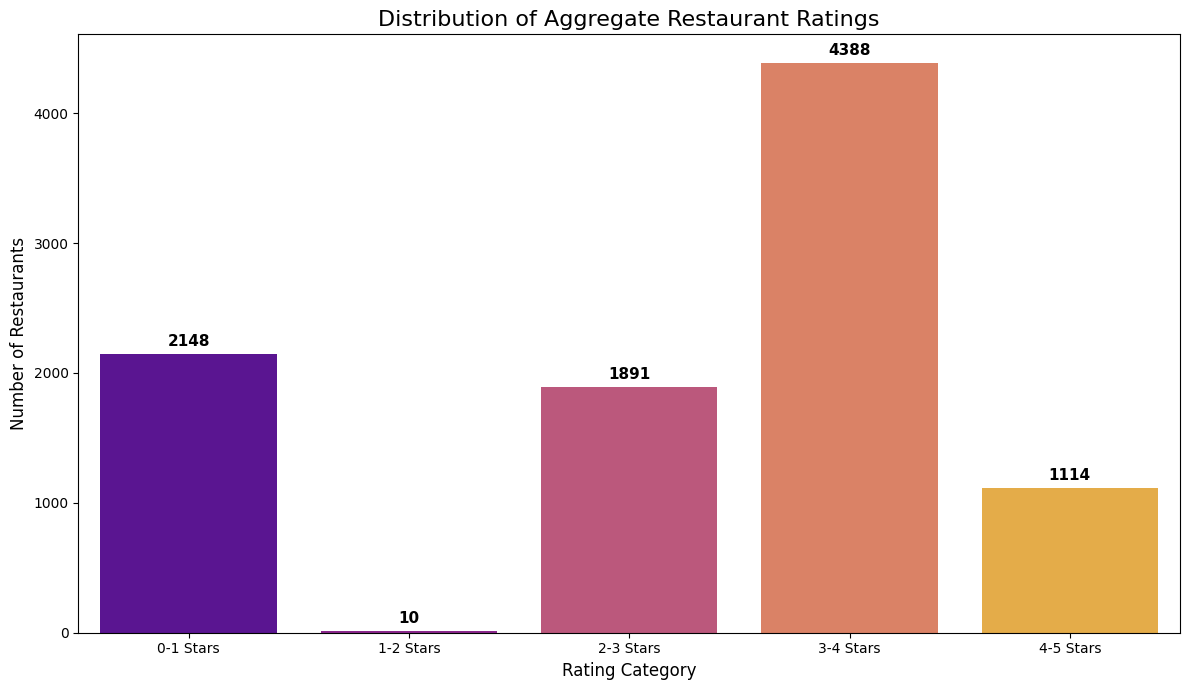

--- Distribution of Restaurant Ratings ---


,Number of Restaurants
Rating Category,
0-1 Stars,2148
1-2 Stars,10
2-3 Stars,1891
3-4 Stars,4388
4-5 Stars,1114



⭐ Most Common Rating Range: 3-4 Stars
🗳️ Average Votes per Restaurant: 156.91


In [58]:
from typing import Tuple

def analyze_restaurant_ratings(dataframe: pd.DataFrame) -> Tuple[pd.DataFrame, float]:
    """
    Analyzes and visualizes the distribution of ratings and calculates average votes.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Aggregate rating' and 'Votes' columns.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: The distribution of ratings (counts per category).
            - float: The average number of votes per restaurant.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_analyzed = dataframe.copy()

    # --- 1. Bin the Aggregate Ratings into Categories ---
    bins = [0, 1, 2, 3, 4, 5]
    labels = ['0-1 Stars', '1-2 Stars', '2-3 Stars', '3-4 Stars', '4-5 Stars']
    df_analyzed['Rating Category'] = pd.cut(
        df_analyzed['Aggregate rating'],
        bins=bins,
        labels=labels,
        include_lowest=True  # Include 0 in the first bin
    )

    # --- 2. Calculate Rating Distribution ---
    rating_distribution = df_analyzed['Rating Category'].value_counts().sort_index()
    rating_distribution_df = pd.DataFrame(rating_distribution).rename(columns={'count': 'Number of Restaurants'})

    # --- 3. Calculate Average Votes ---
    average_votes = dataframe['Votes'].mean()

    # --- 4. Create Visualization with Annotations ---
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=rating_distribution_df.index, y=rating_distribution_df['Number of Restaurants'], palette='plasma')

    # Add data labels (counts) on top of each bar for clarity
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',          # The text to display
                    (p.get_x() + p.get_width() / 2., p.get_height()), # Position
                    ha='center', va='center',         # Alignment
                    xytext=(0, 9),                    # Offset from the point
                    textcoords='offset points',       # Use offset points
                    fontsize=11, weight='bold')

    # --- 5. Final Plot Formatting ---
    plt.title('Distribution of Aggregate Restaurant Ratings', fontsize=16)
    plt.xlabel('Rating Category', fontsize=12)
    plt.ylabel('Number of Restaurants', fontsize=12)
    plt.tight_layout()
    plt.show()

    return rating_distribution_df, average_votes

# --- Execute the analysis ---
rating_dist_results, avg_votes_result = analyze_restaurant_ratings(df)

# --- Display the calculated data and key findings ---
print("--- Distribution of Restaurant Ratings ---")
display(rating_dist_results)
print(f"\n⭐ Most Common Rating Range: {rating_dist_results['Number of Restaurants'].idxmax()}")
print(f"🗳️ Average Votes per Restaurant: {avg_votes_result:.2f}")

### Findings
The analysis of overall restaurant ratings and popularity provides several key insights:

* **Most Common Rating:** The most frequent rating category for restaurants is **3-4 Stars**, which contains **4,388** establishments. This suggests a large base of restaurants that are considered "good" but not "excellent."
* **Note on Unrated Restaurants:** The '0-1 Stars' category has a high count (**2,148**). This is primarily driven by restaurants with an 'Aggregate rating' of 0.0, which in this dataset signifies that they are unrated or have insufficient data, rather than being poorly rated.
* **Average Popularity:** On average, a restaurant in this dataset receives approximately **157 votes**, providing a baseline for what constitutes a typical level of customer engagement.

### Task 2.2: Cuisine Combination Analysis

**Objective:** To explore the relationship between specific cuisine combinations, their popularity (frequency), and their average ratings. This helps answer the question: "Are the most common types of restaurants also the best-rated?"

**Approach:**
1.  **Popularity Count:** The analysis treats each unique string in the 'Cuisines' column as a distinct category. `value_counts()` is used to identify the most frequent cuisine listings.
2.  **Rating Analysis:** The dataset is then filtered to focus only on restaurants belonging to the top 5 most popular listings.
3.  **Grouped Aggregation:** The `groupby()` method is used on this subset to calculate the mean 'Aggregate rating' for each of the top 5.
4.  **Visualization:** A horizontal bar chart is generated to effectively compare the average ratings. Data labels are added to each bar for precise interpretation.

C:\Users\Surekha\AppData\Local\Temp\ipykernel_16292\299190729.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Average_Rating', y=analysis_df.index, data=analysis_df, palette='rocket')


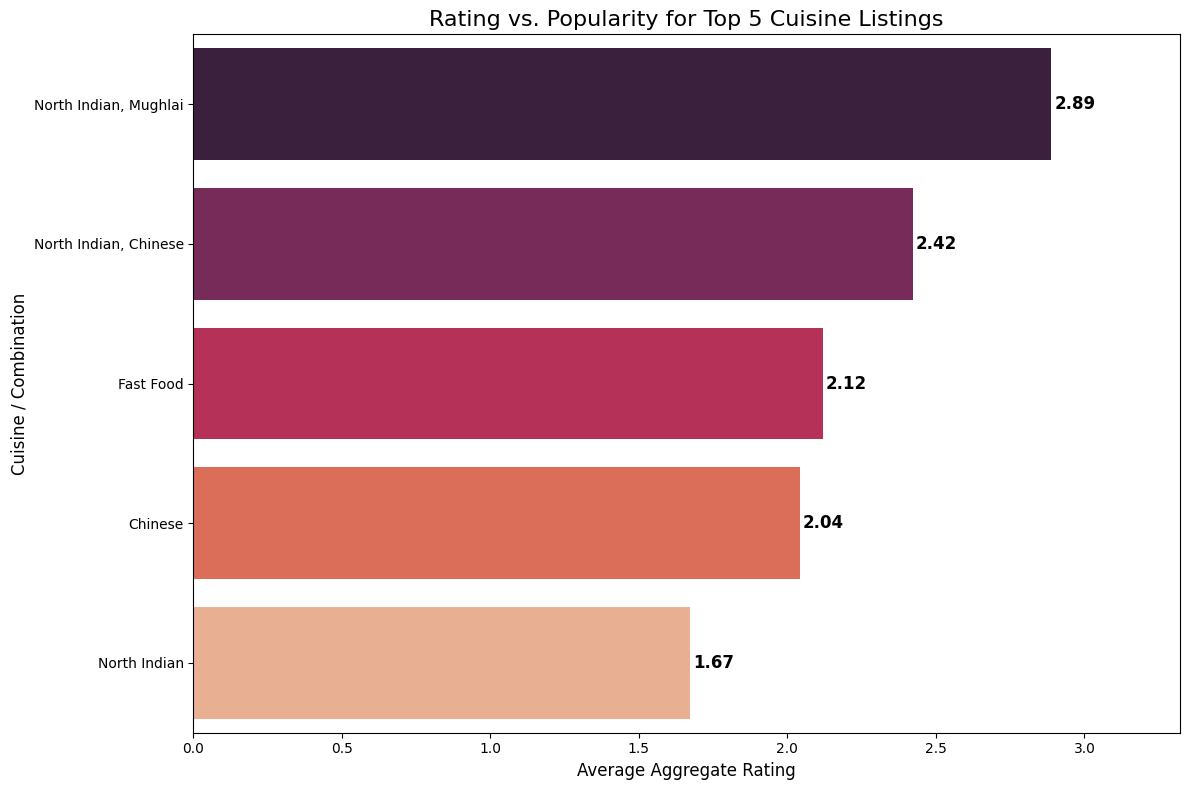


--- Analysis of Top 5 Cuisine Combinations (Sorted by Rating) ---


,Count,Average_Rating
Cuisines,,
"North Indian, Mughlai",334,2.89
"North Indian, Chinese",511,2.42
Fast Food,354,2.12
Chinese,354,2.04
North Indian,936,1.67


In [59]:
def analyze_and_plot_cuisine_combinations(dataframe: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Identifies the most common cuisine combinations, analyzes their average ratings,
    and visualizes the results.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Cuisines' and 'Aggregate rating' columns.
        top_n (int): The number of top combinations to analyze. Defaults to 5.

    Returns:
        pd.DataFrame: A DataFrame containing the count and average rating for the top_n combinations,
                      sorted by average rating.
    """
    # --- 1. Identify Most Common Cuisine Listings ---
    common_combinations = dataframe['Cuisines'].dropna().value_counts().head(top_n)
    
    # --- 2. Analyze Average Ratings for These Top Listings ---
    top_names = common_combinations.index
    df_filtered = dataframe[dataframe['Cuisines'].isin(top_names)]
    avg_ratings = df_filtered.groupby('Cuisines')['Aggregate rating'].mean()
    
    # --- 3. Combine Results into a Single Analysis DataFrame ---
    analysis_df = pd.DataFrame({
        'Count': common_combinations,
        'Average_Rating': avg_ratings
    }).sort_values(by='Average_Rating', ascending=False)

    # --- 4. Create the Visualization ---
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Average_Rating', y=analysis_df.index, data=analysis_df, palette='rocket')

    # --- 5. Add Annotations (Data Labels) for a professional touch ---
    for p in ax.patches:
        width = p.get_width()
        # Place text at the end of the bar
        plt.text(width + 0.01,                  # x-position (slightly past the end of the bar)
                 p.get_y() + p.get_height() / 2,  # y-position (centered vertically)
                 f'{width:.2f}',                  # The text to display (formatted to 2 decimal places)
                 va='center', fontsize=12, color='black', weight='bold')

    # --- 6. Final Plot Formatting ---
    plt.title(f'Rating vs. Popularity for Top {top_n} Cuisine Listings', fontsize=16)
    plt.xlabel('Average Aggregate Rating', fontsize=12)
    plt.ylabel('Cuisine / Combination', fontsize=12)
    plt.xlim(0, max(analysis_df['Average_Rating']) * 1.15) # Add padding to the right for labels
    plt.tight_layout()
    plt.show()

    return analysis_df

# --- Execute the analysis for the top 5 combinations ---
cuisine_combo_results = analyze_and_plot_cuisine_combinations(df, top_n=5)

# --- Display the calculated data table, sorted by rating ---
print("\n--- Analysis of Top 5 Cuisine Combinations (Sorted by Rating) ---")
display(cuisine_combo_results.round(2))

### Findings
This analysis reveals a key insight into the difference between market popularity (frequency) and customer-perceived quality (rating):

* **Popularity vs. Rating:** While a generic listing like **'North Indian'** is the most frequent in the dataset, it holds the lowest average rating (**1.67**) among the top 5 most common listings.
* **Higher-Rated Combinations:** In contrast, the more specialized combination of **'North Indian, Mughlai'** is rated significantly higher, with an average of **2.89**.

**Conclusion:** This suggests that while single-cuisine restaurants may be more widespread, establishments offering more specific or combined culinary experiences tend to receive higher ratings from customers in this dataset.

### Task 2.3: Geographic Analysis with Interactive Clustering

**Objective:** To visualize the geographic distribution of restaurants on an interactive map and to identify spatial patterns and clusters in the data.

**Approach:** The `folium` library will be used to create an interactive HTML map.
1.  **Data Cleaning:** Restaurants with missing latitude or longitude data will be excluded from the plot.
2.  **Map Initialization:** A base map will be created using a clean, minimalist style ('CartoDB positron') and centered on the average coordinates of the restaurants.
3.  **Marker Clustering:** To handle the high density of restaurants in certain areas, the `MarkerCluster` plugin will be used. This is a crucial step for making dense maps readable and performant.
4.  **Data Representation:** A large sample of restaurants will be plotted. Each restaurant is represented by a dot, color-coded by its aggregate rating (Green for high, Orange for medium, Red for low), with a popup for details.
5.  **Output:** The final, interactive map will be saved as an HTML file, which can be opened in any web browser.

*Note: This task requires the `folium` library. If you have not installed it, run the following command in a new cell first: `!pip install folium`*

In [60]:
import folium
from folium.plugins import MarkerCluster

def create_restaurant_map_with_clusters(
    dataframe: pd.DataFrame, 
    sample_size: int = 2000, 
    output_filename: str = 'restaurant_cluster_map.html'
):
    """
    Creates and saves an interactive map with clustered restaurant locations.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Latitude', 'Longitude', 'Aggregate rating', 'Restaurant Name'.
        sample_size (int): The number of random restaurants to plot for performance.
        output_filename (str): The name of the HTML file to save the map as.
    """
    # --- 1. Prepare Geographic Data ---
    df_geo = dataframe.dropna(subset=['Latitude', 'Longitude'])
    
    # Ensure sample size is not larger than the available data
    if sample_size > len(df_geo):
        sample_size = len(df_geo)
    df_sample = df_geo.sample(n=sample_size, random_state=42)

    # --- 2. Create Base Map ---
    # 'CartoDB positron' is a clean, light-colored map style great for data viz
    map_center = [df_sample['Latitude'].mean(), df_sample['Longitude'].mean()]
    restaurant_map = folium.Map(location=map_center, zoom_start=4, tiles='CartoDB positron')

    # --- 3. Create a MarkerCluster Layer (The Professional Touch) ---
    marker_cluster = MarkerCluster().add_to(restaurant_map)

    # --- 4. Add Points to the Cluster Layer ---
    for idx, row in df_sample.iterrows():
        rating = row['Aggregate rating']
        color = 'green' if rating >= 4.0 else ('orange' if rating >= 3.0 else 'red')
        
        # Create a more informative popup with HTML
        popup_text = f"<b>{row['Restaurant Name']}</b><br>Rating: {rating}<br>Cuisine: {row['Cuisines']}"
        
        # Add circle markers to the cluster, not the map directly
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=folium.Popup(popup_text, max_width=250)
        ).add_to(marker_cluster)

    # --- 5. Save the Interactive Map to an HTML File ---
    restaurant_map.save(output_filename)
    print(f"✅ Interactive map created! Please find and open the file '{output_filename}' in your browser.")
    
# --- Execute the map creation ---
create_restaurant_map_with_clusters(df, sample_size=2000)

✅ Interactive map created! Please find and open the file 'restaurant_cluster_map.html' in your browser.


### Findings from the Map
After generating and examining the interactive `restaurant_cluster_map.html` file, several geographic patterns are evident:

* **Primary Cluster - India:** The map is dominated by a massive cluster of restaurants located across India, visually confirming that this is the primary market in the dataset. The clustering is so dense that the `MarkerCluster` feature is essential for navigating the map effectively.
* **Quality within the Cluster:** The prevailing colors within the Indian cluster are orange and red, indicating that most restaurants are in the medium-to-low rating categories. High-rated (green) restaurants are present but are a clear minority.
* **Secondary Clusters:** Smaller, sparse clusters are visible in other regions around the world, including the United States, the United Kingdom, the UAE, and the Philippines.

**Conclusion:** The geographic analysis provides a powerful visual confirmation of the dataset's heavy concentration in India and highlights the utility of interactive clustering to explore spatial density and quality simultaneously.

### Task 2.4: Restaurant Chain Analysis

**Objective:** To identify restaurant chains within the dataset and analyze their performance based on their size (number of outlets), popularity (total votes), and average customer ratings. This final analysis helps to understand the dynamics of branded vs. standalone restaurants in the market.

**Approach:**
1.  **Chain Identification:** A restaurant is defined as a 'chain' if its name appears more than once. The `value_counts()` method is used to find all such instances.
2.  **Performance Metrics:** For each identified chain, three key metrics are calculated using `groupby()` and `agg()`: total number of outlets, average aggregate rating, and the sum of all votes.
3.  **Analysis & Ranking:** The chains are ranked to identify the largest (by outlet count) and the highest-rated (among chains with a significant presence, defined as >10 outlets).
4.  **Visualization:** A scatter plot is created to visualize the relationship between a chain's size and its quality, with bubble size representing overall popularity. This provides a comprehensive overview of the chain landscape.

In [61]:
from typing import Tuple

def analyze_restaurant_chains(
    dataframe: pd.DataFrame, 
    min_outlets_for_top_rated: int = 10
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Identifies restaurant chains from the dataset and analyzes their performance metrics.

    Args:
        dataframe (pd.DataFrame): Must contain 'Restaurant Name', 'Aggregate rating', and 'Votes' columns.
        min_outlets_for_top_rated (int): The minimum number of outlets for a chain to be included
                                         in the "top rated" analysis. Defaults to 10.

    Returns:
        tuple: A tuple containing two DataFrames:
            - A full analysis of all chains, sorted by outlet count.
            - An analysis of the top-rated chains that meet the minimum outlet criteria.
    """
    # --- 1. Identify all unique chains in the dataset ---
    name_counts = dataframe['Restaurant Name'].value_counts()
    chains = name_counts[name_counts > 1]
    df_chains_only = dataframe[dataframe['Restaurant Name'].isin(chains.index)]

    # --- 2. Calculate Key Performance Metrics for Each Chain ---
    chain_analysis = df_chains_only.groupby('Restaurant Name').agg(
        Outlets=('Restaurant Name', 'size'),
        Average_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum')
    )

    # --- 3. Identify the Top-Rated Chains above the outlet threshold ---
    top_rated_chains = chain_analysis[chain_analysis['Outlets'] >= min_outlets_for_top_rated].sort_values(
        by='Average_Rating', ascending=False
    )
    
    # Return the full analysis (sorted by size) and the top-rated list
    return chain_analysis.sort_values(by='Outlets', ascending=False), top_rated_chains

# --- Execute the analysis ---
all_chains_analysis, top_rated_chains_analysis = analyze_restaurant_chains(df, min_outlets_for_top_rated=10)

# --- Display the key data tables ---
print("--- Analysis of Top 5 Largest Chains (by Outlet Count) ---")
display(all_chains_analysis.head().round(2))

print("\n--- Top 5 Highest-Rated Chains (with more than 10 outlets) ---")
display(top_rated_chains_analysis.head().round(2))

--- Analysis of Top 5 Largest Chains (by Outlet Count) ---


,Outlets,Average_Rating,Total_Votes
Restaurant Name,,,
Cafe Coffee Day,83,2.42,2428
Domino's Pizza,79,2.74,6643
Subway,63,2.91,6124
Green Chick Chop,51,2.67,964
McDonald's,48,3.34,5291



--- Top 5 Highest-Rated Chains (with more than 10 outlets) ---


,Outlets,Average_Rating,Total_Votes
Restaurant Name,,,
Barbeque Nation,26,4.35,28142
Starbucks,18,3.81,7139
Haldiram's,16,3.62,4525
Chaayos,18,3.54,2473
Burger King,16,3.41,4617


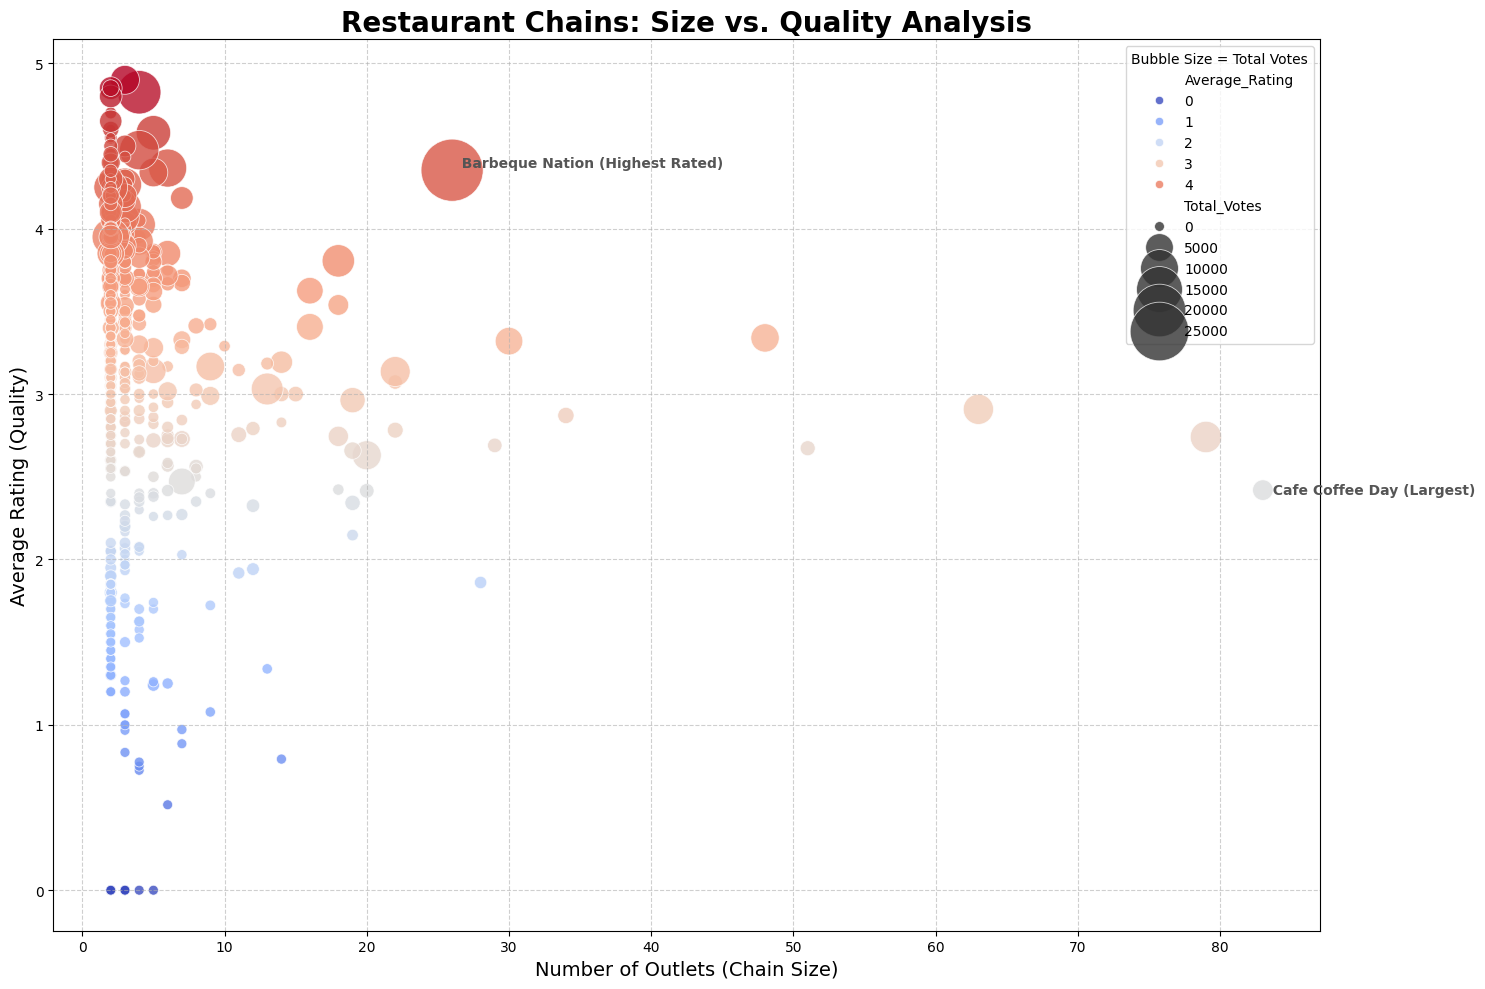

In [62]:
# --- Professional Visualization: Chain Size vs. Quality ---
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(
    data=all_chains_analysis,
    x='Outlets',
    y='Average_Rating',
    size='Total_Votes',
    hue='Average_Rating',
    palette='coolwarm',
    sizes=(50, 2000),  # Control the range of bubble sizes
    alpha=0.8,
    legend='auto'
)

# --- Annotate Key Chains for Storytelling ---
# Find the largest and best-rated chains from our analysis DataFrames
largest_chain = all_chains_analysis.iloc[0]
best_rated_chain = top_rated_chains_analysis.iloc[0]

# Add text labels to the plot
plt.text(largest_chain['Outlets'], largest_chain['Average_Rating'], f"  {largest_chain.name} (Largest)", 
         ha='left', va='center', fontsize=10, weight='bold', color='#555555')
plt.text(best_rated_chain['Outlets'], best_rated_chain['Average_Rating'], f"  {best_rated_chain.name} (Highest Rated)", 
         ha='left', va='bottom', fontsize=10, weight='bold', color='#555555')

# --- Final Plot Formatting ---
plt.title('Restaurant Chains: Size vs. Quality Analysis', fontsize=20, weight='bold')
plt.xlabel('Number of Outlets (Chain Size)', fontsize=14)
plt.ylabel('Average Rating (Quality)', fontsize=14)
ax.legend(title='Bubble Size = Total Votes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Findings
The final analysis of restaurant chains provides a comprehensive view of the competitive landscape:

* **Chain Presence:** The dataset contains **734 unique restaurant chains**. The largest is **Cafe Coffee Day** with 83 outlets, but it maintains a modest average rating of 2.42.
* **Elite Chains:** The highest-rated chains (with over 10 outlets) include **Barbeque Nation** (4.35 avg rating) and **Starbucks** (3.81 avg rating), demonstrating that strong brands can maintain high quality across multiple locations.
* **Size vs. Quality:** The scatter plot reveals there is **no strong correlation** between the size of a chain (number of outlets) and its average rating. Some of the largest chains have mediocre ratings, while some smaller chains are rated very highly. The bubble size, representing total votes, shows that some large, lower-rated chains (like Domino's Pizza) still generate significant customer engagement.

## Internship Project Conclusion

This completes the analysis for Level 1 and Level 2. This project has successfully uncovered key insights into cuisine popularity, geographic market dynamics, restaurant affordability, the impact of online delivery, and the performance of restaurant chains. The findings from these 8 tasks provide a solid foundation for data-driven business recommendations.